### Computational Guided Inquiry for PChem (Neshyba, 2021)


# Visualizing $P(T,V)$


### Maxwell's thermodynamic surface

A fundamental idea of thermodynamics is the notion of _thermodynamic surfaces_. James Clerk Maxwell famously made three plaster models of a thermodynamic surface, and gave one as a present to Gibbs, shown below.

<p style='text-align: center;'>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Maxwell%27s_thermodynamic_surface%2C_commentary_book_figures_1%2C2.jpg" height="500" width="500"/>

__Figure 1__. Thermodynamic surface of the energy of an idealized water-like substance constructed by James Clerk Maxwell as a gift to Josiah Willard Gibbs$^1$. 
</p>

These models depict the energy of an idealized, water-like substance as a function of its volume and entropy. We'll return to the ideas of energy and entropy later, for now the important point is that _all_ substances (real or idealized) are characterized by various thermodynamic surfaces.

Some nomenclature will help keep these ideas in mind. When we're looking at a thermodynamic surface, the *height* is called the *state function*, and the "ground" is called the _state space_. Also, our symbol for energy is $U$, for volume $V$, and for entropy $S$. So a compact description of Maxwell's surface could be $U(V,S)$.

### Other thermodynamic surfaces
In fact, we've already encountered two mathematical descriptions of a different thermodynamic surface, $P(T,V)$. One is given by the ideal gas law,

$$
P(T,V) = \dfrac{n R T}{V} \ \ \ \ (1)
$$

and the other is given by vdw, 

$$
P(T,V) = {{n R T} \over {V - nb}} - {{n^2 a} \over V^2}  \ \ \ (2)
$$

Here, the state function is $P$, and the state space is ($T,V$).

So what does $P(T,V)$ look like? If you have some plaster, you could make one, like Maxwell did. Or, you could use a computer to generate it. That's what this CGI is all about.

### Grids in Python
To get to where we need to get, we'll have to introduce the idea of a *grid* (or *meshgrid*). You can think of a grid as a bunch of arrays stacked up parallel to each other. Here, we'll construct two state space grids (one for each state space variable) and a third state function grid. 

### Learning goals
The main learning goals of this exercise can be phrased follows. 
1. I have a working understanding of what python functions are and why one would want to create one's own.
1. I know how to join strings together.
1. I can explain what a *state space* is, and I can create grids of state space variables of a desired range and number of elements.
1. I can use Python to visualize simple gas equations of state (like the ideal gas or a van der Waals gas) as a thermodynamic surface.
1. I know where, in state $T,V$ state space, ideal behavior deviates most from a "real" gas (treating van der Waals gas as real).

### References
(1) Willard Gibbs: American Genius (1942), by Muriel Rukeyser.  

In [10]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
import sympy as sp
%matplotlib notebook

###  Constants for our pressure calculation
We'll be using 1 mole of gas, and working in the L-atm unit system

In [11]:
# Moles, and the gas constant
n = AssignQuantity(1,"mol"); print(n)
R = AssignQuantity(0.082057,"L atm /(mol K)"); print(R)

1 mole
0.082057 liter * standard_atmosphere / kelvin / mole


### String manipulations
The code below does some string manipulation. It'll come in handy when we need to label the axes of plots.

In [12]:
# Join two strings
string1 = "Hello "
string2 = "World!"
label = string1+string2
print(label)

# Join a string with a number
string1 = "speed of light = "
string2 = str(3e8)
label = string1+string2
print(label)

# Join a string with units
string1 = "The units of n are "
string2 = str(n.units)
label = string1+string2
print(label)

Hello World!
speed of light = 300000000.0
The units of n are mole


### Your turn
Create a label from the units of R, something like "The units of R are ", joined with the units of R.

In [13]:
### BEGIN SOLUTION
string1 = "The units of R are "
string2 = str(R.units)
label = string1+string2
print(label)
### END SOLUTION

The units of R are liter * standard_atmosphere / kelvin / mole


### Creating state spaces using a Pchem function
Python functions are procedures or algorithms that you might want to use a bunch of times. Python has a lot of built-in functions, that are widely used -- like the exponent function, for example. In Pchem, however, you'll see that we often have our own particular needs that aren't met by any built-in function. 

Fortunately, Python has a way to create our own, tailor-made functions! They're stored in a library that was imported at the start of this notebook, called PchemLibrary.py; the way they are imported is such that that we can use them by prefixing "PL." to the function name. 

The cell below uses one such function, called PL.Statespace, to create state space variables called xgrid and ygrid; subsequent command lines attach units to them. Execute the cell to see how this works!

In [14]:
# This creates the numerical grid
xgrid,ygrid = PL.Statespace([2,4,3],[5,8,4])

# This attaches units
xgrid = AssignQuantity(xgrid,"meter")
ygrid = AssignQuantity(ygrid,"meter")

# Checking out the results
print(np.shape(xgrid),xgrid)
print(np.shape(ygrid),ygrid)

(3, 4) [[2.0 2.0 2.0 2.0] [3.0 3.0 3.0 3.0] [4.0 4.0 4.0 4.0]] meter
(3, 4) [[5.0 6.0 7.0 8.0] [5.0 6.0 7.0 8.0] [5.0 6.0 7.0 8.0]] meter


### Your turn
Here you'll practice your state-space-making skills. Here's what we want:
- variable "Tgrid", having 51 values, running from 200 to 400 K
- variable "Vgrid", having 42 values, running from 1 to 42 L

Also, use AssignQuantity to make the units of Tgrid 'K', and the units of Vgrid 'L'.

In [15]:
### BEGIN SOLUTION
Tgrid,Vgrid = PL.Statespace([200,400,51],[1,42,42])
Tgrid,Vgrid = PL.Statespace([100,600,51],[1,42,42])
Tgrid = AssignQuantity(Tgrid,"K")
Vgrid = AssignQuantity(Vgrid,"L")
print(np.shape(Tgrid))
print(Tgrid)
print(np.shape(Vgrid))
print(Vgrid)
### END SOLUTION

(51, 42)
[[100.0 100.0 100.0 ... 100.0 100.0 100.0] [110.0 110.0 110.0 ... 110.0 110.0 110.0] [120.0 120.0 120.0 ... 120.0 120.0 120.0] ... [580.0 580.0 580.0 ... 580.0 580.0 580.0] [590.0 590.0 590.0 ... 590.0 590.0 590.0] [600.0 600.0 600.0 ... 600.0 600.0 600.0]] kelvin
(51, 42)
[[1.0 2.0 3.0 ... 40.0 41.0 42.0] [1.0 2.0 3.0 ... 40.0 41.0 42.0] [1.0 2.0 3.0 ... 40.0 41.0 42.0] ... [1.0 2.0 3.0 ... 40.0 41.0 42.0] [1.0 2.0 3.0 ... 40.0 41.0 42.0] [1.0 2.0 3.0 ... 40.0 41.0 42.0]] liter


### Visualizing the ideal gas equation of state as a thermodynamic surface
In the cell below, we use another PchemLibrary function -- the plot_surface function -- to visualize the ideal gas equation of state as a thermodynamic surface.

The units of pressure are standard_atmosphere


<IPython.core.display.Javascript object>


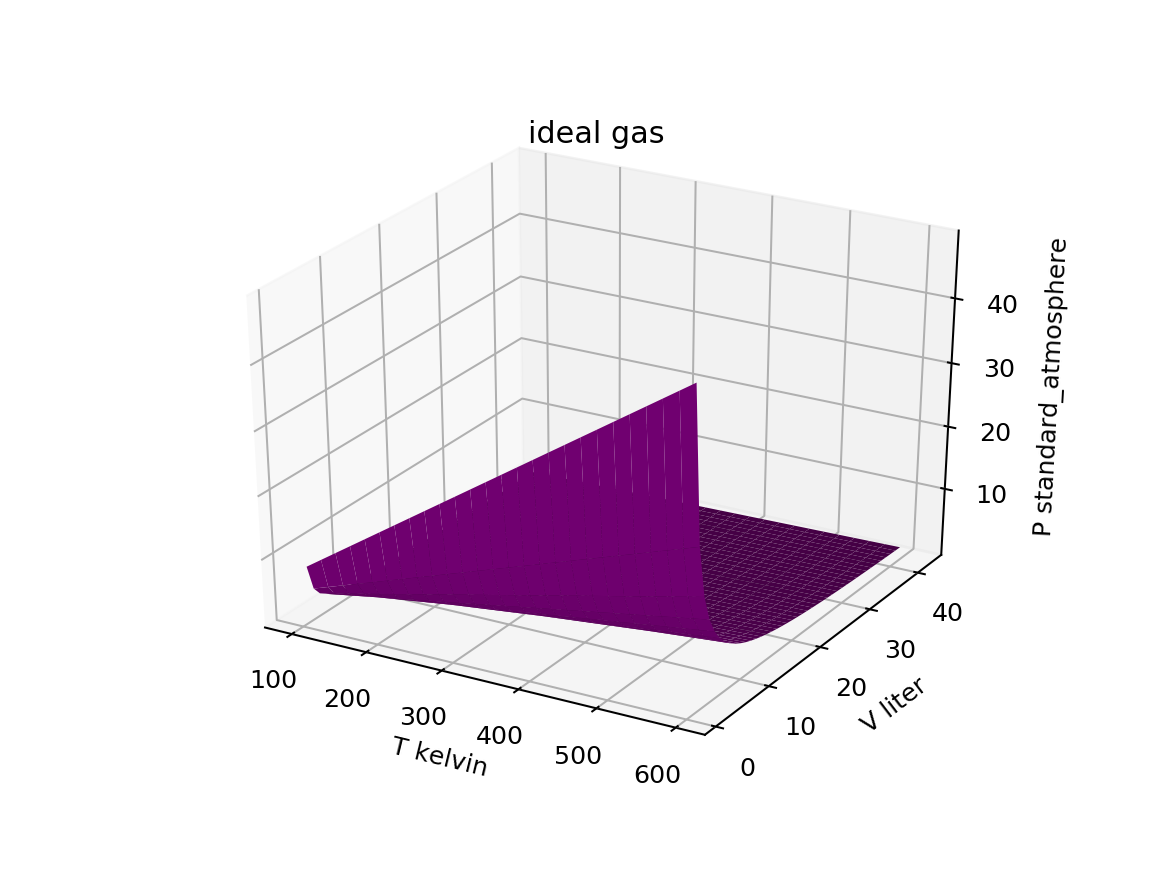

Text(0.5, 0.92, 'ideal gas')

In [16]:
# Get the pressure of an ideal gas
Pgrid_ideal = n*R*Tgrid/Vgrid
print("The units of pressure are "+str(Pgrid_ideal.units))

# Prepping the axis labels
xlabel = "T "+str(Tgrid.units)
ylabel = "V "+str(Vgrid.units) 
zlabel = "P "+str(Pgrid_ideal.units)

# Graph the pressure
ax = PL.plot_surface(Tgrid, Vgrid, Pgrid_ideal, color='purple') # Make the mesh plot P(V,T)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
ax.set_title("ideal gas")

### Your turn - vdw
Using the same state space, make a new gridded variable Pgrid_vdw, for Argon gas. Don't forget to specify the units of vdw parameters $a$ and $b$. Also, make some reasonable labels for your axes.

1.355 bar * liter ** 2 / mole ** 2
0.03201 liter / mole
The units of pressure are standard_atmosphere


<IPython.core.display.Javascript object>


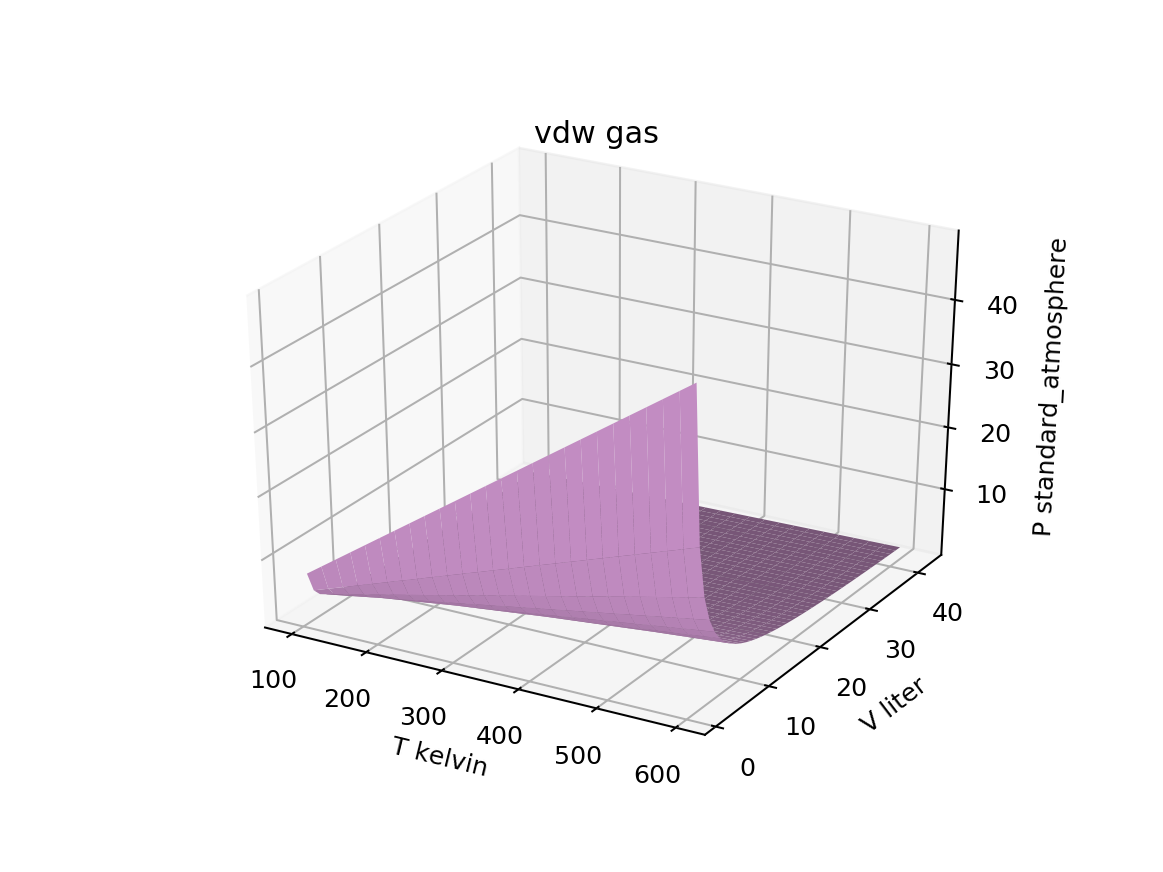

Text(0.5, 0.92, 'vdw gas')

In [17]:
### BEGIN SOLUTION
# Helium
# Ar
a = AssignQuantity(1.355,'L^2 bar / mol^2'); print(a)
b = AssignQuantity(0.03201,'L /mol'); print(b)

# Calculating the pressure on this state space
Pgrid_vdw = n*R*Tgrid/(Vgrid-n*b)-n**2*a/Vgrid**2
print("The units of pressure are "+str(Pgrid_vdw.units))

# Graph the pressure
ax = PL.plot_surface(Tgrid, Vgrid, Pgrid_vdw, color='plum') # Make the mesh plot P(V,T)
ax.set_xlabel("T "+str(Tgrid.units))
ax.set_ylabel("V "+str(Vgrid.units)) # Label axes
ax.set_zlabel("P "+str(Pgrid_ideal.units))
ax.set_title("vdw gas")
### END SOLUTION

### Your challenge: Inspecting the deviation from ideal
In the cell below, calculate a new thermodynamic surface as the difference between the vdw and the ideal surfaces. You can use a command like this:

    Pgrid_diff = Pgrid_vdw - Pgrid_ideal
    
Then display *that* surface in a temperature-volume state space. Add appropriate labeling, etc.

standard_atmosphere


<IPython.core.display.Javascript object>


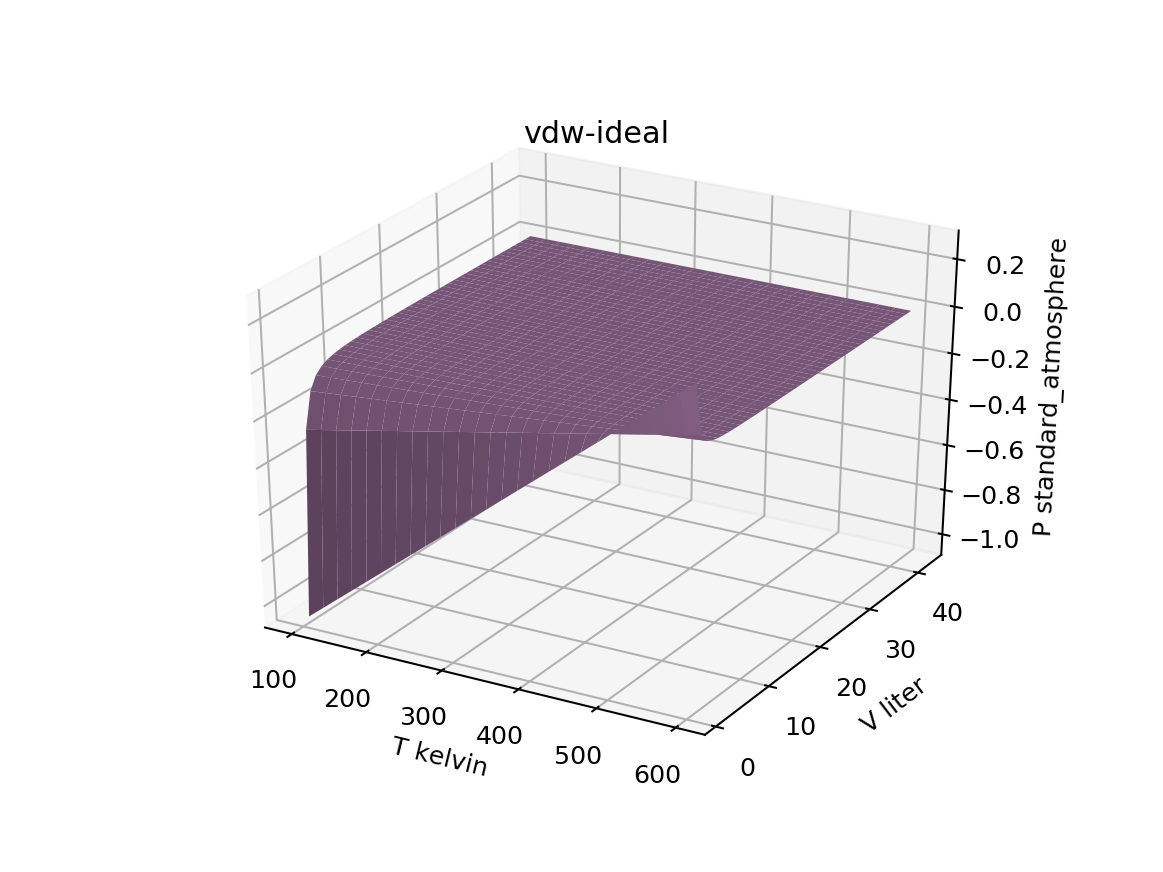

In [18]:
### BEGIN SOLUTION
Pgrid_diff = Pgrid_vdw.to("atm") - Pgrid_ideal.to("atm")
print(Pgrid_diff.units)

# Graph the pressure
ax = PL.plot_surface(Tgrid, Vgrid, Pgrid_diff, color='plum') # Make the mesh plot P(V,T)
ax.set_xlabel("T "+str(Tgrid.units)) # Label axes
ax.set_ylabel("V "+str(Vgrid.units))
ax.set_zlabel("P "+str(Pgrid_ideal.units))
ax.set_title("vdw-ideal")

# This is for the instructor: Turn Saving to True is you want to save these files to the PchemLibrary
Saving = False
if Saving:
    np.savetxt('../PchemLibrary/Pgrid_ideal.txt', Pgrid_ideal)
    np.savetxt('../PchemLibrary/Pgrid.txt', Pgrid_ideal)
    np.savetxt('../PchemLibrary/Pgrid_vdw.txt', Pgrid_vdw)
    np.savetxt('../PchemLibrary/Vgrid.txt',  Vgrid)
    np.savetxt('../PchemLibrary/Tgrid.txt',  Tgrid)
    
### END SOLUTION

### Pause for Analysis
In your paper notebook, sketch this surface. Make sure you label your axes. Then, in the cell below:

1. Use the sign of the deviation to respond to the question, at low temperatures, which seems to be more important, intermolecular *attractions* or intermolecular *repulsions?*
1. How about at high temperatures?
1. Are these effects more evident at low volume, or at high volume?

### One last refresh and save
We're at the end of the notebook. You should repeat the "Three steps for refreshing and saving your code" you did before. Instead of using the dropdown menu "Cell/Run All Above", however, you may as well use "Cell/Run All".

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Three steps for finishing up
Assuming all this has gone smoothly, there will be three more steps (but read this carefully before carrying them out):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page